### Part Three
This is part three of the take home challenge for Ultimate Technologies.<br />
<br />
<p>Ultimate is interested in predicting rider retention.  To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014.  The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days. </p>
<p>We would like you to use this dataset to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. </p>
<p>The data is in the attached file ultimate_data_challenge.json.  See below for a detailed description of the dataset.  Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. </p>

In [4]:
# Load data
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_json('C:\\Users\\rxbro\\Downloads\\1481053515_ultimate_challenge\\ultimate_challenge\\ultimate_data_challenge.json')
df = pd.DataFrame(data)

In [3]:
display(df.shape)
display(df.info())
display(df.columns)

(50000, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


None

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

Of the 12 columns, 3 have null values: avg_rating_by_driver, avg_rating_of_driver, and phone.  avg_rating_of_driver has the most missing values with over 8k.

In [4]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [7]:
# Check the fraction of drivers who were retained.
# Relevant column would be last_trip-date
df.last_trip_date[0]

'2014-06-17'

In [8]:
# convert date to strings
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [10]:
df['last_trip_date'].describe()

<ipython-input-10-0832a502f142>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

The last trip occurred on July 1st at midnight.  Since we are checking for the percentage of users who were retained, we nned to look at the fraction of users who were active in June.

In [11]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

37% of users were retained.  Create a column called 'was_retained' based on this result.  This column will be our target column for modeling.

In [12]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


Let's do some EDA to show some relationships between our features and our target variable.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int32 

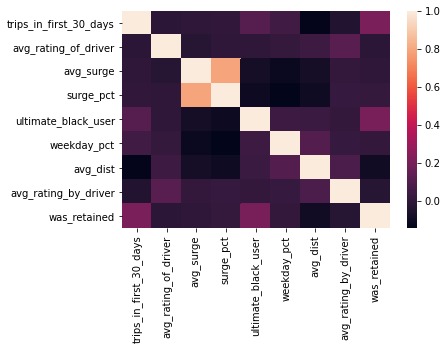

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [15]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

The only values worth noting here is whether or not the user took a trip in the first 30 days and whether or not they are an Ultimate Black user or not.  Let's check out the non-numeric columns.

In [16]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [17]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

Only 3 cities and 2 phone types.  We will need to OHE them.  Since these columns have few values, we don't need to worry about dimensionality increasing.  Before continuing, we need to do something about the null values.

In [18]:
(df.phone[df.phone.isnull()]).value_counts()

Series([], Name: phone, dtype: int64)

In [19]:
df.phone.fillna('Other', inplace=True)
df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [20]:
cities_ohe = pd.get_dummies(df['city'])
phones_ohe = pd.get_dummies(df['phone'])

In [21]:
df = df.join(cities_ohe).join(phones_ohe)

In [22]:
df.drop(['city', 'phone'], axis=1, inplace=True)

In [23]:
# move 'was_retained' to the end of the dataframe
col_at_end = ['was_retained']
df = df[[c for c in df if c not in col_at_end] + [c for c in col_at_end if c in df]]

In [24]:
df.describe().iloc[:, -7:-1]

,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p> 46% of riders are from Winterfell, 33% from Astapor, and 20% are from King's Landing (GoT reference?) </p>
<p> 70% of the phone users use iPhone and the remainder use Android.  A very small percentage use neither. </p>
Let's find any correlations.

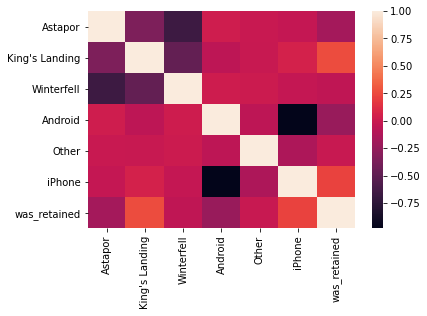

In [25]:
categoricals = df.iloc[:, -7:]
fig = plt.figure()
ax = plt.subplot(111)
corr = categoricals.corr()
ax = sns.heatmap(corr)
plt.show()

In [26]:
corr['was_retained'].sort_values(ascending=False)

was_retained      1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: was_retained, dtype: float64

The only values that have a positive correlation are people from King's Landing using iPhones.  People from Astapor or Winterfell using Android devices are negatively correlated with retention. <br />
To see if the date columns are correlated with retention, we need to encode them.  We expect last_trip_date to have a very high correlation because the retention column was created from the last_trip_date.  In the model, we will need to remove this in order to prevent it from inflating our performance.

In [27]:
df.signup_date.describe()

<ipython-input-27-9de9b943d4a9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.signup_date.describe()


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [28]:
df.last_trip_date.describe()

<ipython-input-28-65c97afa6614>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.last_trip_date.describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [29]:
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100

In [30]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,was_retained
0,4,25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0,1,0,0,0,1,1
1,0,29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,1,0,0,1,0,0,0
2,3,6,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1,0,0,0,0,1,0
3,9,10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,0,1,0,0,0,1,1
4,14,27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,1,1,0,0,0


In [31]:
df['signup_date'].corr(df['was_retained'])

-0.020210618434848227

In [32]:
ref = min(df['last_trip_date'])
df['last_trip_date'] = (df['last_trip_date'] - ref).dt.days + 1

In [33]:
df['last_trip_date'].corr(df['was_retained'])

0.7808374961937242

As expected, a very high correlation.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int32  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   last_trip_date          50000 non-null  int64  
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  Astapor                 50000 non-null  uint8  
 11  King's Landing          50000 non-null  uint8  
 12  Winterfell              50000 non-null  uint8  
 13  Android                 50000 non-null  uint8  
 14  Other                   50000 non-null

We need to convert the ultimate_black_user column so we can see it in the describe method.

In [35]:
df['ultimate_black_user'] = df['ultimate_black_user'] * 1
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,was_retained
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,0.37708,60.926084,5.796827,4.778158,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640,0.376080
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,0.48466,37.081503,5.707357,0.446652,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821,0.484405
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have examined every relationship between every feature and created our target variable.  All of our features are now numeric and we are ready for modeling.

## Steps Used in Classification Using Scikit-Learn
<ol>
    <li>Preprocess Data</li>
    <li>Create Training and Test Sets</li>
    <li>Instantiate the model/estimator (Steps 1 to 3 can be done in a Pipeline)</li>
    <li>Specify Hyperparameter Space</li>
    <li>Instantiate GridSearchCV or RandomizedSearchCV objects</li>
    <li>Fit CV object to training set</li>
    <li>Predict on Test set</li>
    <li>Compute Scores on the Model</li>
 </ol>
 <i>Models:</i>
 <ol>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbors</li>
    <li>Support Vector Machine</li>
    <li>Decision Trees</li>
    <li>Random Forest</li>
    <li>Naive Bayes</li>
 </ol>

In [36]:

df = pd.DataFrame(data)
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [38]:
# Step 1 - Preprocess Data
np.random.seed(0)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder())])
numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and column not in ['last_trip_date', 'was_retained']]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

In [17]:
# Step 2 - Split data into training and test sets.
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [40]:
# Create a dataframe to store different metrics from the models.
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'],
                      columns=['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes'])

In [41]:
metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time to Train,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Useful function for training and scoring models.
# Steps 5-8
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    ### Step 5 - Instantiate the CV object
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else:
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)
    # Step 6 - Fit on the training set
    t0 = time.time()
    cv.fit(X_train, y_train)
    time_to_train = time.time() - t0
    print("It takes %.3f seconds for %s fitting" % (time_to_train, model_name))
    metrics.loc['Time to train', model_name] = time_to_train
    # Step 7 - Predict on the test set
    y_pred = cv.predict(X_test)
    ### Step 8 - Scoring
    ### Accuracy
    print("Accuracy with " + model_name + " on the testing set is: %.3f" % cv.score(X_test, y_test))
    metrics.loc['accuracy', model_name] = accuracy_score(y_pred = y_pred, y_true = y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred = y_pred, y_true = y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred = y_pred, y_true = y_test)
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)
    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    if model_name != 'Support Vector Machine':
        #ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot([0, 1],[0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()
    return cv

In [19]:
def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint

# Step 3 - Instantiate the model/estimator
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()

classifiers = [classifier_dm, classifier_lr, classifier_knn, classifier_svm, classifier_dt, classifier_rf, classifier_nb]

# Step 4: Specify the Hyperparameter Space
param_grid_dm = None
param_grid_lr = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}
param_grid_knn = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': np.arange(1,20)
}
param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}
param_grid_dt = {
                'preprocessor__num__imputer__strategy': ['mean', 'median'],
                'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]
}
param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}
param_grid_nb = None

param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, param_grid_svm, param_grid_dt, param_grid_rf, param_grid_nb]

model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes']
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 'svm_cv', 'dt_cv', 'rf_cv', 'nb_cv']
cvs = [None, 5, 5, 5, 5, 5, 5]

It takes 0.116 seconds for Dummy Model fitting
Accuracy with Dummy Model on the testing set is: 0.624
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          9359         0   9359
Retained              5641         0   5641
Total                15000         0  15000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      9359
           1       0.00      0.00      0.00      5641

    accuracy                           0.62     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.39      0.62      0.48     15000



C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


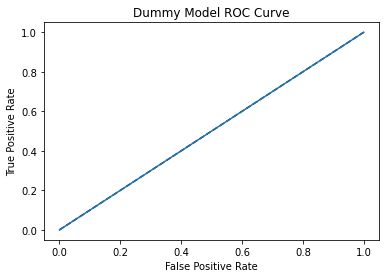

C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


It takes 52.224 seconds for Logistic Regression fitting
Accuracy with Logistic Regression on the testing set is: 0.716
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7984      1375   9359
Retained              2880      2761   5641
Total                10864      4136  15000
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9359
           1       0.67      0.49      0.56      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



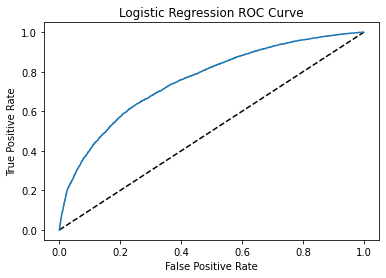

C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


It takes 78.301 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighbors on the testing set is: 0.750
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7739      1620   9359
Retained              2125      3516   5641
Total                 9864      5136  15000
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      9359
           1       0.68      0.62      0.65      5641

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



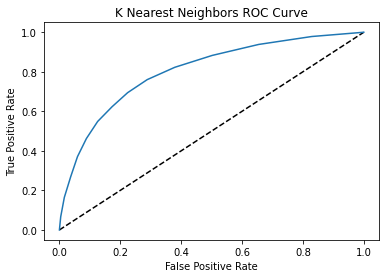

C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


It takes 3851.086 seconds for Support Vector Machine fitting
Accuracy with Support Vector Machine on the testing set is: 0.767
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8178      1181   9359
Retained              2307      3334   5641
Total                10485      4515  15000
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9359
           1       0.74      0.59      0.66      5641

    accuracy                           0.77     15000
   macro avg       0.76      0.73      0.74     15000
weighted avg       0.76      0.77      0.76     15000



C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


It takes 6.057 seconds for Decision Tree fitting
Accuracy with Decision Tree on the testing set is: 0.759
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7867      1492   9359
Retained              2117      3524   5641
Total                 9984      5016  15000
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      9359
           1       0.70      0.62      0.66      5641

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



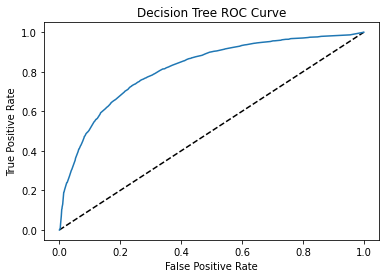

C:\Users\rxbro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


It takes 69.281 seconds for Random Forest fitting
Accuracy with Random Forest on the testing set is: 0.778
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8037      1322   9359
Retained              2002      3639   5641
Total                10039      4961  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



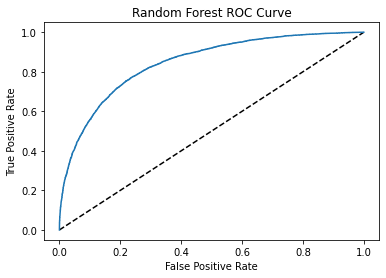

It takes 0.113 seconds for Naive Bayes fitting
Accuracy with Naive Bayes on the testing set is: 0.692
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6419      2940   9359
Retained              1678      3963   5641
Total                 8097      6903  15000
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      9359
           1       0.57      0.70      0.63      5641

    accuracy                           0.69     15000
   macro avg       0.68      0.69      0.68     15000
weighted avg       0.71      0.69      0.70     15000



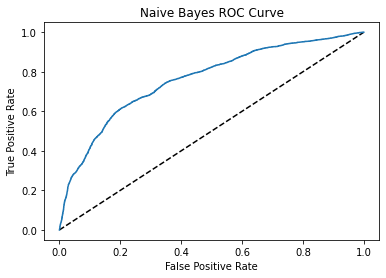

In [45]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dt)])
dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_nb)])
nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)

In [46]:
from pandas.plotting import table
metrics.astype(float).round(3)
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']] * 100
actual_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,62.4,71.6,75.0,76.7,75.9,77.8,69.2
precision,0.0,66.8,68.5,73.8,70.3,73.4,57.4
recall,0.0,48.9,62.3,59.1,62.5,64.5,70.3
AUC,50.0,75.7,80.4,NaN,81.6,84.5,76.1


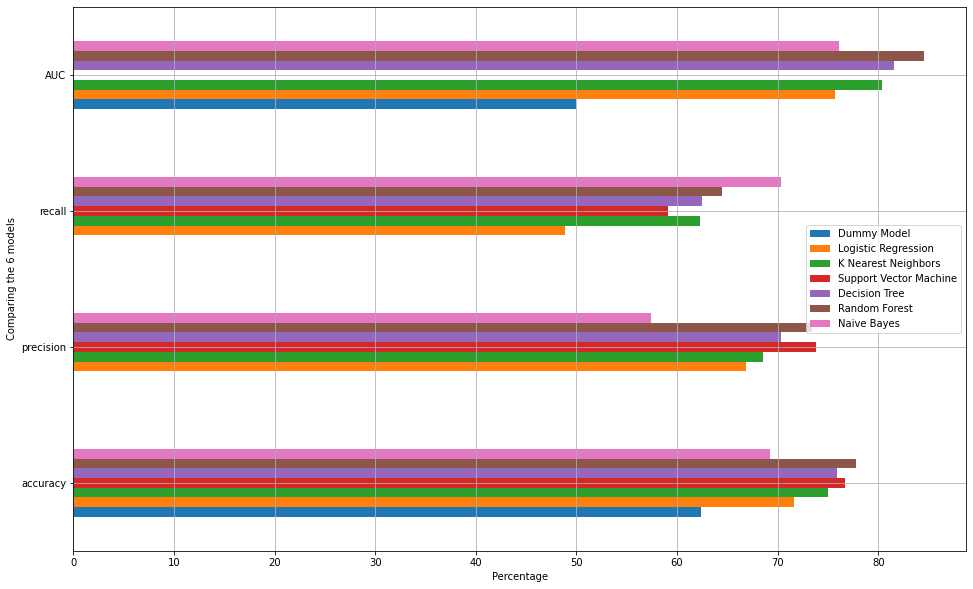

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_ylabel('Comparing the 6 models')
ax.grid()

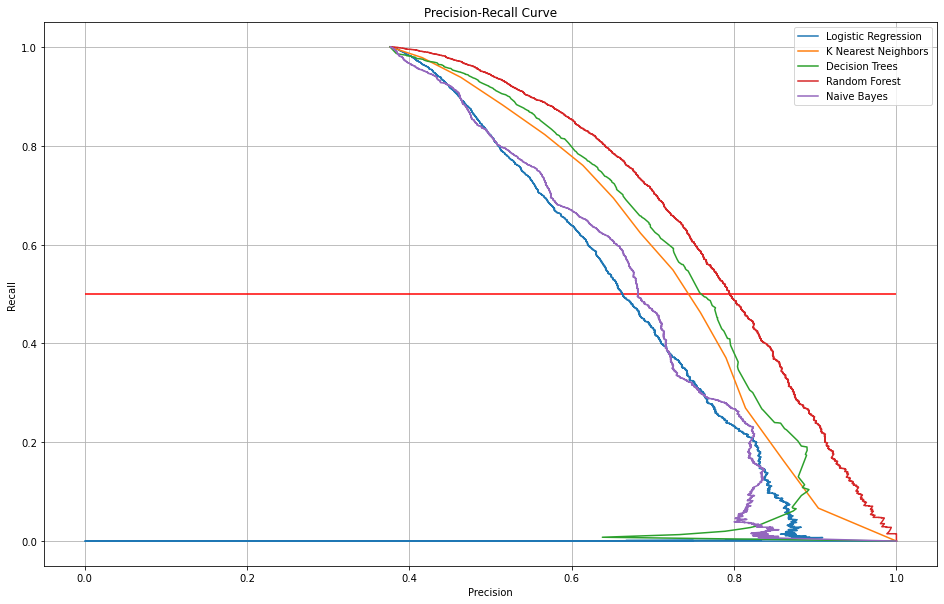

In [48]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=lr_cv.predict_proba(X_test)[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=knn_cv.predict_proba(X_test)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=dt_cv.predict_proba(X_test)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=rf_cv.predict_proba(X_test)[:,1])
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=nb_cv.predict_proba(X_test)[:,1])
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(precision_lr, recall_lr, label='Logistic Regression')
ax.plot(precision_knn, recall_knn, label='K Nearest Neighbors')
ax.plot(precision_dt, recall_dt, label="Decision Trees")
ax.plot(precision_rf, recall_rf, label="Random Forest")
ax.plot(precision_nb, recall_nb, label="Naive Bayes")
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title("Precision-Recall Curve")
ax.hlines(y=0.5, xmin = 0, xmax = 1, color='red')
ax.legend()
ax.grid()

<p>Random Forest produces the best model, wich an accuracy score of .778, which is 15% better than the dummy model.  In addition to having the highest accuracy, it also has the best AUC score of any model.  Please note that there is no AUC score for the SVM model because the SVC class does not have a predict_proba method.</p>
<p>We would be able to achieve better scores for accuracy, but this comes at a price.  By default, the probability threshold is set at 50%.  If we cared more about recall, we would need to lower the threshold for classification to make sure we classified as retained more of the customers we actually retained.  This comes at the price of precision.  If we cared more about precision, then the probability threshold would need to be raised.</p>
<p>In this scenario, to determine which one we cared more about maximizing, we need the answer to the following question: What do we want to avoid more, predicting that a retained customer will not be retained (FN) or predicting that a non-retained customer will be retained (FP)?  Since we don't have enough information, the threshold will be left alone.</p>
<p>We have used several classification models to predict whether or not customers will be retained.  The biggest concern that we have is that we may value false negatives more than we would false positives.  In this case, the Random Forest would still be the best model because it has the best precision-recall curve of any of the models.</p>
<p>Any questions about the model or any other concern is best answered by interpreting the models.  However, we will now need to run the model again with the optimal hyperparameters.</p>

In [49]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 20,
 'classifier__max_features': 3,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 7,
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'mean'}

In [50]:
rf_model = rf_cv.best_estimator_

In [51]:
rf_model.named_steps['classifier'].feature_importances_

array([0.07287396, 0.0946823 , 0.05736528, 0.06949593, 0.08493398,
       0.04416002, 0.13768368, 0.1359289 , 0.12449299, 0.02722262,
       0.06768078, 0.01933287, 0.03240125, 0.00050753, 0.03123791])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int32  
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  was_retained            50000 non-null  int32  
dtypes: bool(1), float64(6), int32(2), int64(2), object(2)
memory usage: 4.2+ MB


In [53]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [9]:
with open('C:\\Users\\rxbro\\Downloads\\1481053515_ultimate_challenge\\ultimate_challenge\\ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['was_retained'] = (df.last_trip_date >= '2014-06-01') * 1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1
df.phone.fillna('Other', inplace=True)
df['city'] = df['city'].astype('category')
df['phone'] = df['phone'].astype('category')
df = pd.get_dummies(df)

In [10]:
# Imputation
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(), inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(), inplace=True)

In [13]:
classifier_rf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50)

It takes 1.118 seconds for Random Forest fitting
Accuracy with Random Foreston the test set is: 0.778
ROC AUC score is: 0.845
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8030      1329   9359
Retained              2003      3638   5641
Total                10033      4967  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.64      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.77      0.78      0.77     15000



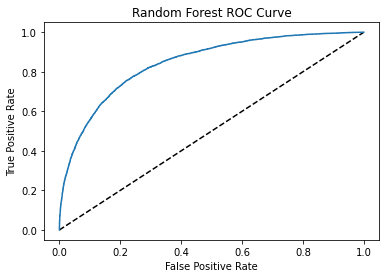

In [20]:
t0 = time.time()
classifier_rf.fit(X_train, y_train)
time_to_train = time.time() - t0
print("It takes %.3f seconds for %s fitting" % (time_to_train, "Random Forest"))
y_pred = classifier_rf.predict(X_test)
print("Accuracy with " + 'Random Forest' + "on the test set is: %.3f" % classifier_rf.score(X_test, y_test))
y_pred_prob = classifier_rf.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" % roc_auc_score(y_test, y_pred_prob))
print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Random Forest')
plt.show()

In [21]:
pd.DataFrame(classifier_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

,importance
weekday_pct,0.137684
avg_dist,0.135929
avg_rating_by_driver,0.124493
signup_date,0.094682
surge_pct,0.084934
trips_in_first_30_days,0.072874
avg_surge,0.069496
city_King's Landing,0.067681
avg_rating_of_driver,0.057365
ultimate_black_user,0.044160


The top 3 columns of importance are weekday_pct, avg_dist, and driver rating (avg_rating_by_driver).

In [22]:
display(df['avg_rating_by_driver'].corr(df['was_retained']))
display(df['avg_dist'].corr(df['was_retained']))
display(df['weekday_pct'].corr(df['was_retained']))

-0.02674804280606973

-0.09277986324064293

0.009692972843291875

Despite that the magnitude of these correlations are very small, the results are a little puzzling.  Average rating by driver is negatively correlated with retention, implying that higher rated users are less likely to be retained.  This means that we want the users to be poorly rated, but we want the reverse of this. We want the user be to be comfortable; more comfortable riders are likely to be lower rated.  We would need to tell the drivers to make the users more comfortable.

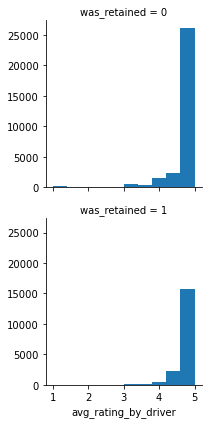

In [23]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "avg_rating_by_driver")

The second most important feature is average distance, which is only slightly negatively correlated with retention.

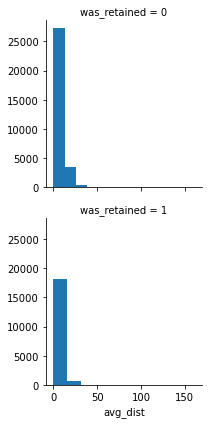

In [24]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, 'avg_dist')

The connection here is not very obvious.  Ultimate may want to do more research into the effect of the distance of each trip would have user retention.

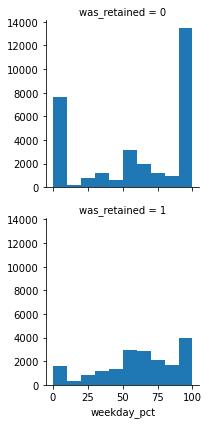

In [25]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, 'weekday_pct')

For the final feature, weekday_pct, we see that a lot of trips occur on a weekday and that the non-retained user distribution shows far more users who use the service only on weekends or use it during the week.  Ultimate should target the users who have no difference in their need for transportation between the week and weekends.